## Spatial multi-criteria analysis for the strategic spatial placement of blue-green infrastructure

The goal of this jupyter notebook is to handle the analysis and data (pre)processing of 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
gdf = gpd.read_file(
    filename="./Data/ribu_wur_soildata.gpkg"
)

gdf.dropna(subset='lutumgehalte', inplace=True)

topsoil_samples = gdf[(gdf['BOVENKANT'] < 0.2) & (gdf['ONDERKANT'].between(0.2, 0.5))]

subsoil_samples = gdf[(gdf['BOVENKANT'] > 0.2) & (gdf['ONDERKANT'] > 0.5)]

In [4]:
# We can calculate the leem fraction as 100 - sand fraction. The sand fraction can be approximated from the soc using the formula: sand = -6 * soc + 82
topsoil_samples['leem'] = 100 - (-6 * topsoil_samples['organisch_stofgehalte'] + 82)
subsoil_samples['leem'] = 100 - (-6 * subsoil_samples['organisch_stofgehalte'] + 82)

/home/vscode/.local/lib/python3.12/site-packages/geopandas/geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/vscode/.local/lib/python3.12/site-packages/geopandas/geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [5]:
topsoil_samples.head()

,datum,boorpunt_ID,BOVENKANT,ONDERKANT,analysemonster_ID,lutumgehalte,organisch_stofgehalte,geometry,leem
4,NaT,12088,0.1,0.5,8616,1.0,0.8,POINT (121641 483535),22.8
16,NaT,17290,0.0,0.5,12928,1.0,0.7,POINT (122317 483576),22.2
17,NaT,17291,0.0,0.5,12929,5.0,11.9,POINT (122284 483579),89.4
20,NaT,17357,0.0,0.5,12973,1.0,0.4,POINT (121484 483339),20.4
22,NaT,17365,0.0,0.2,12979,1.5,16.9,POINT (122391.906 484589.127),119.4


In [6]:
# First, we retrieve the soil type from the lutumgehalte column.
# We can do this because the Netherlands, and thus Amsterdam as well, has a limited number of soil types that can be derived almost solely from the lutumgehalte.
def determine_topsoil_type(lutumfractie, os, leem):
    if 0 <= os <= 15:
        if 0 <= lutumfractie <= 8:
            if 0 <= leem <= 10:
                return "B01"
            elif 10 < leem <= 18:
                return "B02"
            elif 18 < leem <= 33:
                return "B03"
            elif 33 < leem <= 50:
                return "B04"
            elif 50 < leem <= 100:
                return "B05"
        if 8 < lutumfractie <= 12:
            return "B07"
        elif 12 < lutumfractie <= 18:
            return "B08"
        elif 18 < lutumfractie <= 25:
            return "B09"
        elif 25 < lutumfractie <= 35:
            return "B10"
        elif 35 < lutumfractie <= 50:
            return "B11"
        elif 50 < lutumfractie <= 100:
            return "B12"
    elif lutumfractie < 8:
        if 15 < os < 25:
            return "B15"
        elif 25 < os:
            return "B16"
    elif lutumfractie > 8:
        if 16 < os < 45:
            return "B17"
        elif 45 < os < 70:
            return "B18"
        
    
def determine_subsoil_type(lutumfractie, os, leem):
    if 0 <= os <= 3:
        if 0 <= lutumfractie <= 8:
            if 0 <= leem <= 10:
                return "O01"
            elif 10 < leem <= 18:
                return "O02"
            elif 18 < leem <= 33:
                return "O03"
            elif 33 < leem <= 50:
                return "O04"
            elif 50 < leem <= 100:
                return "O05"
        if 8 < lutumfractie <= 12:
            return "O08"
        elif 12 < lutumfractie <= 18:
            return "O09"
        elif 18 < lutumfractie <= 25:
            return "O10"
        elif 25 < lutumfractie <= 35:
            return "O11"
        elif 35 < lutumfractie <= 50:
            return "O12"
        elif 50 < lutumfractie <= 100:
            return "O13"
    elif 15 <= os <= 35:
        return "O18"
    elif 35 <= os <= 100:
        return "O17"


In [7]:
topsoil_samples['type'] = topsoil_samples.apply(
    lambda row: determine_topsoil_type(row['lutumgehalte'], row['organisch_stofgehalte'], row['leem']),
    axis=1
)

subsoil_samples['type'] = subsoil_samples.apply(
    lambda row: determine_subsoil_type(row['lutumgehalte'], row['organisch_stofgehalte'], row['leem']),
    axis=1
)

topsoil_samples.head()

/home/vscode/.local/lib/python3.12/site-packages/geopandas/geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/vscode/.local/lib/python3.12/site-packages/geopandas/geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,datum,boorpunt_ID,BOVENKANT,ONDERKANT,analysemonster_ID,lutumgehalte,organisch_stofgehalte,geometry,leem,type
4,NaT,12088,0.1,0.5,8616,1.0,0.8,POINT (121641 483535),22.8,B03
16,NaT,17290,0.0,0.5,12928,1.0,0.7,POINT (122317 483576),22.2,B03
17,NaT,17291,0.0,0.5,12929,5.0,11.9,POINT (122284 483579),89.4,B05
20,NaT,17357,0.0,0.5,12973,1.0,0.4,POINT (121484 483339),20.4,B03
22,NaT,17365,0.0,0.2,12979,1.5,16.9,POINT (122391.906 484589.127),119.4,B15


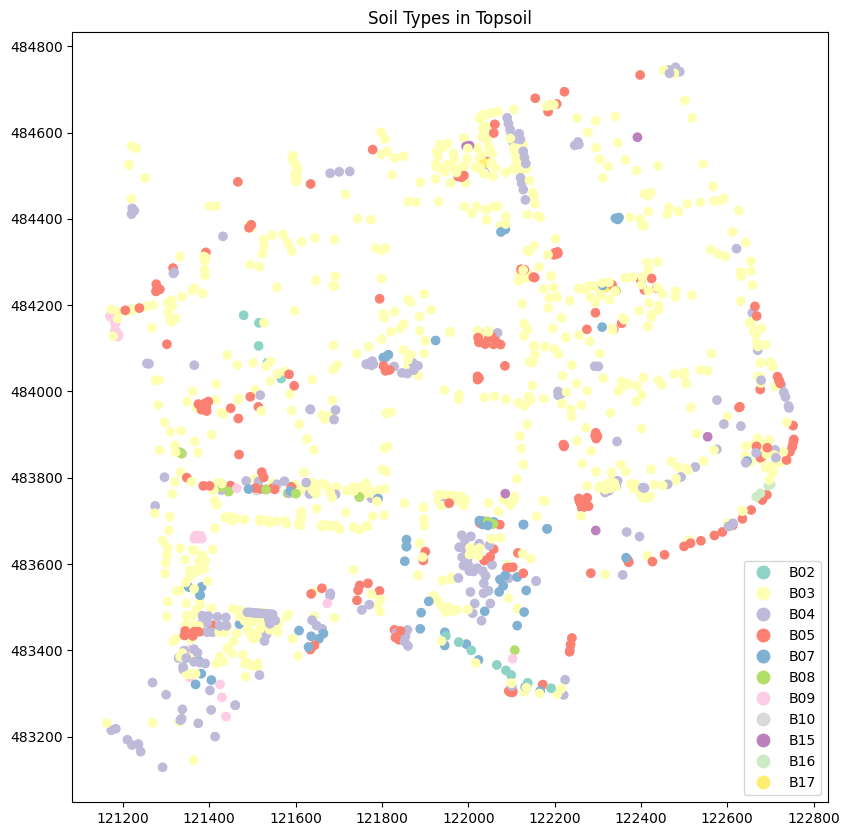

In [8]:
# Plot the soil types in the topsoil
fig, ax = plt.subplots(figsize=(10, 10))
topsoil_samples.plot(column='type', ax=ax, legend=True, cmap='Set3')
ax.set_title('Soil Types in Topsoil')
plt.show()

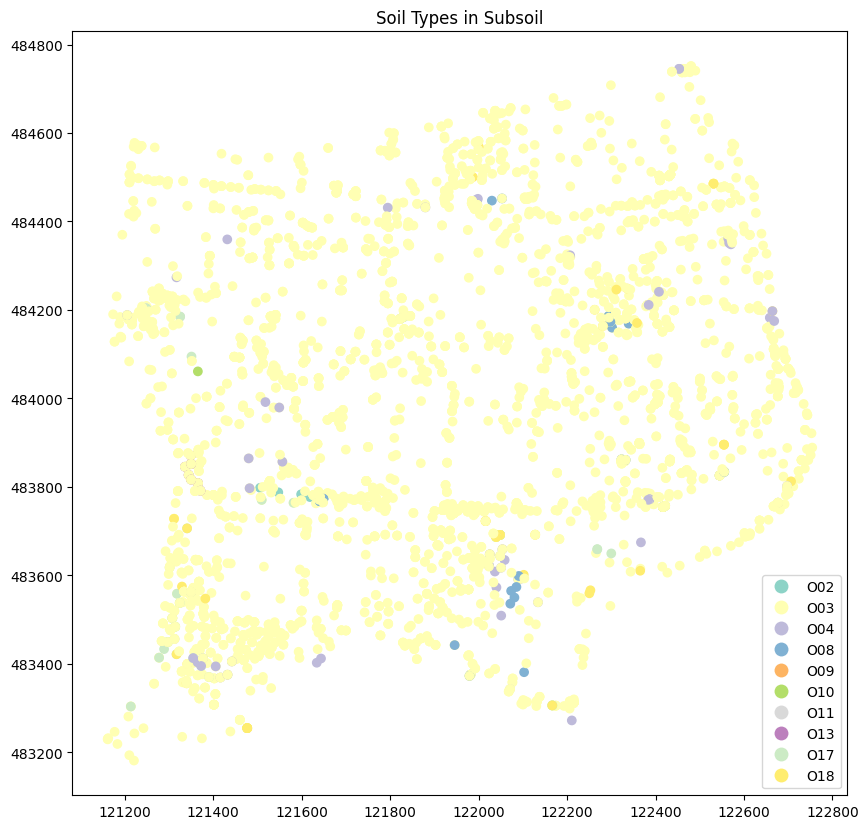

In [9]:
# Plot the soil types in the subsoil
fig, ax = plt.subplots(figsize=(10, 10))
subsoil_samples.plot(column='type', ax=ax, legend=True, cmap='Set3')
ax.set_title('Soil Types in Subsoil')
plt.show()